In [86]:
import os
import numpy as np
import pandas as pd
import numpy_indexed as npi

from tqdm.notebook import tqdm
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter1d as smooth

from src.ipm import grablabels, NeuronLoader

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = NeuronLoader('G:\Data\Fast\Both')

In [56]:
selectivity = "fast"

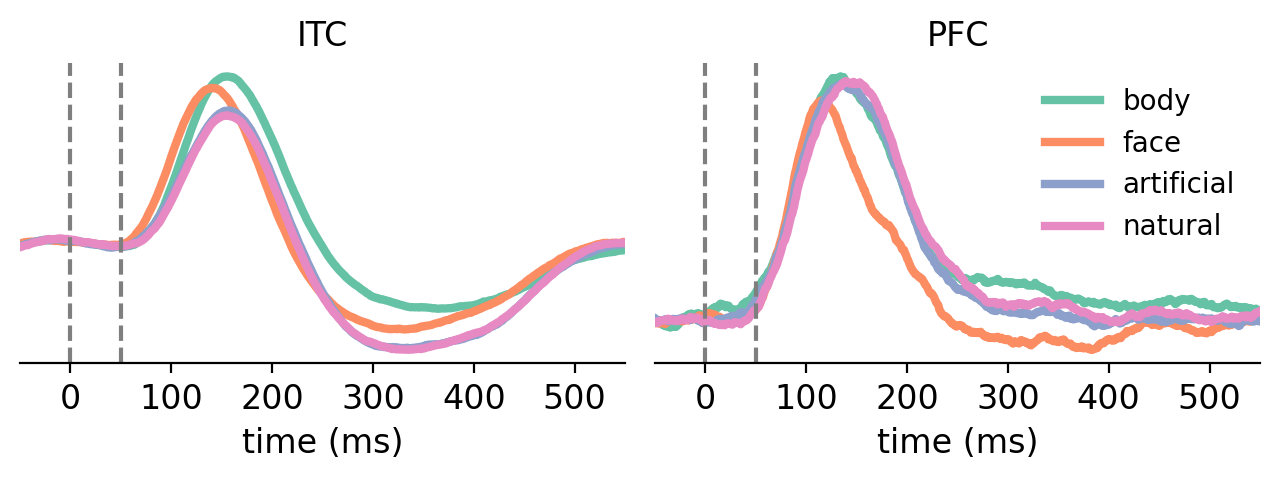

In [110]:
# X = (data.it - (data.it.min(2, keepdims=True))) / (data.it.max(2, keepdims=True) - data.it.min(2, keepdims=True))
# Y = (data.pfc - (data.pfc.min(2, keepdims=True))) / (data.pfc.max(2, keepdims=True) - data.pfc.min(2, keepdims=True))
fontsize = 12
sns.set_palette("Set2")

fig, axs = plt.subplots(1, 2, figsize=np.array([6.5, 2.5]), dpi=200)
for cat in ['face-body', 'natural-artificial']:
    lbl = grablabels(cat)
    for l in [0, 1]:
        X = data.it[lbl==l].mean(0)
        X = (X - (X.min(1, keepdims=True))) / (X.max(1, keepdims=True) - X.min(1, keepdims=True))
        X -= X[:, (data.time<0) & (data.time>=-50)].mean(1, keepdims=True)
        axs[0].plot(data.time, np.transpose(X.mean(0)), lw=3)
        # axs[0].fill_between(data.time, 
        #                     X.mean(0) + X.std(0), 
        #                     X.mean(0) - X.std(0), 
        #                     label='_nolegend_', alpha=.1)
        
        X = data.pfc[lbl==l].mean(0)
        X = (X - (X.min(1, keepdims=True))) / (X.max(1, keepdims=True) - X.min(1, keepdims=True))
        X -= X[:, (data.time<0) & (data.time>=-50)].mean(1, keepdims=True)
        axs[1].plot(data.time, np.transpose(X.mean(0)), lw=3)
        # axs[1].fill_between(data.time, 
        #                     X.mean(0) + X.std(0), 
        #                     X.mean(0) - X.std(0), 
        #                     label='_nolegend_', alpha=.25)

sns.despine(left=True)
axs[0].set_title("ITC", fontsize=fontsize)
axs[1].set_title("PFC", fontsize=fontsize)    

axs[1].legend(["body", "face", "artificial", "natural"], fontsize=10, frameon=False)

for ax in axs:
    ax.set_yticks([])
    ax.axvline(x=0, color='tab:gray', linestyle='dashed', label='_nolegend_')
    ax.axvline(x=50 if selectivity=="fast" else 250, color='tab:gray', linestyle='dashed', label='_nolegend_')    
    ax.set_xlim(-50, 550)
    ax.set_xlabel('time (ms)', fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

fig.tight_layout()
fig.savefig(os.path.join("G:/Codes/Processing/out/psth", "psth_all.eps"), format='eps')
fig.savefig(os.path.join("G:/Codes/Processing/out/psth", "psth_all.jpg"), dpi=1000)